# Import Library & Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
only_zeros=X_train[y_train==0]

In [5]:
only_zeros.shape

(5923, 28, 28)

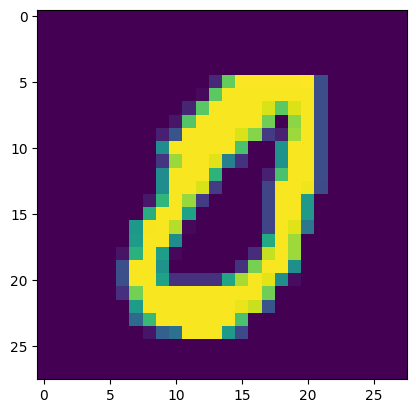

In [6]:
plt.imshow(only_zeros[10])

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential

# Generator

In [8]:
codings_size=100

generator=Sequential()
generator.add(Dense(100,activation='relu',input_shape=[codings_size]))
generator.add(Dense(150,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28]))

# Discriminator

In [9]:
discriminator=Sequential()
discriminator.add(Flatten(input_shape=[28,28]))
discriminator.add(Dense(150,activation='relu'))
discriminator.add(Dense(100,activation='relu'))
discriminator.add(Dense(1,activation='sigmoid'))

discriminator.compile(loss='binary_crossentropy',optimizer='adam')

# Model Processing

In [10]:
GAN=Sequential([generator,discriminator])

In [11]:
discriminator.trainable=False

In [12]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [13]:
my_data=only_zeros
batch_size=32

dataset=tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

dataset=dataset.batch(batch_size,drop_remainder=True).prefetch(1)

In [14]:
GAN.layers[0].summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 784)               118384    
                                                                 
 reshape (Reshape)           (None, 28, 28)            0         
                                                                 
Total params: 143,634
Trainable params: 143,634
Non-trainable params: 0
_________________________________________________________________


In [15]:
GAN.layers[1].summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 150)               117750    
                                                                 
 dense_4 (Dense)             (None, 100)               15100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 132,951
Trainable params: 0
Non-trainable params: 132,951
_________________________________________________________________


# Bulding the Model

In [16]:
epochs=1
generator,discriminator=GAN.layers

for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    
    for X_batch in dataset:
        
        i=i+1
        
        if i%100==0:
            print(f"\t Currently on batch number {i} of {len(my_data)//batch_size}")
        
        noise=tf.random.normal(shape=[batch_size,codings_size])
        gen_images=generator(noise)
        
        X_fake_vs_real=tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
        
        y1=tf.constant([[0.0]]*batch_size + [[1.0]]*batch_size)
        
        discriminator.trainable=True
        
        discriminator.train_on_batch(X_fake_vs_real,y1)
        
        noise=tf.random.normal(shape=[batch_size,codings_size])
        
        y2=tf.constant([[1.0]]*batch_size)
        
        discriminator.trainable=False
        
        GAN.train_on_batch(noise,y2)

Currently on Epoch 1
	 Currently on batch number 100 of 185


In [17]:
noise=tf.random.normal(shape=[10,codings_size])

In [18]:
noise.shape

TensorShape([10, 100])

In [19]:
images=generator(noise)

In [20]:
images.shape

TensorShape([10, 28, 28])

# Final Output

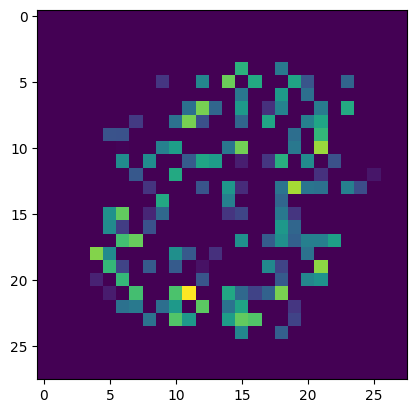

In [21]:
plt.imshow(images[2])